About the Dataset:

1.   id: unique id for a news article
2.   title: the title of a news article

1.   author: author of the news article
2.   text: the text of the article; could be incomplete

1.   label: a label that marks whether the news article is real or fake:

*    0: real News , reliable
*    1: Fake news , unreliable
    











Import the labraries

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [44]:
# loading the dataset to a pandas DataFrame
news_data = pd.read_csv('/content/train.csv')

In [45]:
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [46]:
news_data.shape

(21024, 5)

In [47]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21024 entries, 0 to 21023
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      21024 non-null  int64 
 1   title   20459 non-null  object
 2   author  19051 non-null  object
 3   text    20985 non-null  object
 4   label   21024 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 821.4+ KB


In [48]:
# counting the number of missing values in the dataset
news_data.isnull().sum()

id           0
title      565
author    1973
text        39
label        0
dtype: int64

In [49]:
# replacing the null values with empty string
news_data = news_data.fillna('')

In [50]:
# merging the author name and news title
news_data['content'] = news_data['author']+' '+news_data['title']

In [51]:
print(news_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
21019    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
21020    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
21021    Michael J. de la Merced and Rachel Abrams Macy...
21022    Alex Ansary NATO, Russia To Hold Parallel Exer...
21023              David Swanson What Keeps the F-35 Alive
Name: content, Length: 21024, dtype: object


In [52]:
# separating the data & label
X = news_data.drop(labels= 'label' , axis=1)
Y = news_data['label']

In [53]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
21019  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
21020  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
21021  20797  Macy’s Is Said to Receive Takeover Approach by...   
21022  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
21023  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [54]:
port_stem = PorterStemmer()

In [55]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [56]:
news_data['content'] = news_data['content'].apply(stemming)

In [57]:
print(news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
21019    jerom hudson rapper trump poster child white s...
21020    benjamin hoffman n f l playoff schedul matchup...
21021    michael j de la merc rachel abram maci said re...
21022    alex ansari nato russia hold parallel exercis ...
21023                            david swanson keep f aliv
Name: content, Length: 21024, dtype: object


In [58]:
#separating the data and label
X = news_data['content'].values
Y = news_data['label'].values

In [59]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [60]:
print(Y)

[1 0 1 ... 0 1 1]


In [61]:
Y.shape

(21024,)

In [62]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [63]:
print(X)

  (0, 15686)	0.28453210434296416
  (0, 13473)	0.2562704713038291
  (0, 8909)	0.3638338425976752
  (0, 8630)	0.29240546233774445
  (0, 7692)	0.24790517901708756
  (0, 7005)	0.21830205878716644
  (0, 4973)	0.2334519766003702
  (0, 3792)	0.2708265176660955
  (0, 3600)	0.3601336010644098
  (0, 2959)	0.24665799430172217
  (0, 2483)	0.36788699861079044
  (0, 267)	0.26954423104963826
  (1, 16799)	0.3016356603086612
  (1, 6816)	0.1907686130862265
  (1, 5503)	0.7141066370252958
  (1, 3568)	0.2637552362237865
  (1, 2813)	0.19108529009370012
  (1, 2223)	0.3819317415776323
  (1, 1894)	0.155326965962488
  (1, 1497)	0.2942723931027918
  (2, 15611)	0.41555006701308805
  (2, 9620)	0.49237862013898115
  (2, 5968)	0.34731251725722845
  (2, 5389)	0.3873250924867311
  (2, 3103)	0.46163754302696314
  :	:
  (21021, 13122)	0.24814519209791425
  (21021, 12344)	0.272102695570723
  (21021, 12138)	0.2472223982412174
  (21021, 10306)	0.08033250319293911
  (21021, 9588)	0.17452621080590872
  (21021, 9518)	0.295774

Splitting the dataset to training & test data

In [65]:
X_train, X_test ,Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2)

Training the Model: Logistic Regression

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [68]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [69]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9875735775016351


In [70]:
# accuracy score on the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [71]:
print('Accuracy score of the testing data : ', testing_data_accuracy)

Accuracy score of the testing data :  0.9740784780023781


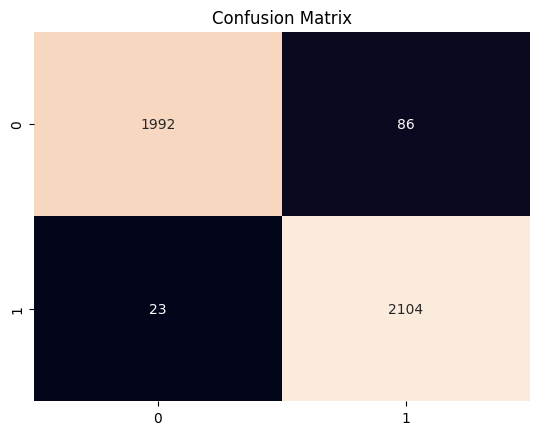

In [75]:
y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar = False)
plt.title("Confusion Matrix")
plt.show()

Making a Predictive System

In [77]:
X_new = X_test[1935]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [78]:
print(Y_test[1935])

1
